In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LocallyConnected1D
import numpy as np
import os

Using TensorFlow backend.


In [2]:
import keras.backend as tf

In [3]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [5]:
# generate dataset
x = (np.linspace(0,10000,1000)/10000-0.5)*math.pi
y = np.sin(x)
noise = np.random.normal(0,0,y.shape)
y_noise = y+noise
print(x.shape,y.shape)

(1000,) (1000,)


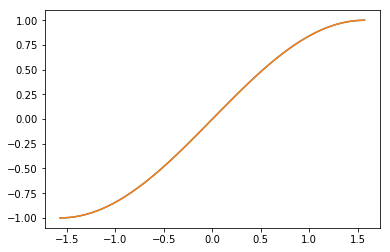

In [6]:
# show data
plt.plot(x,y,x,y_noise)
plt.show()

In [7]:
# build model
model = Sequential()
model.add(Dense(10,input_shape=(1,)))
model.add(Activation("relu"))
model.add(Dense(20))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("relu"))
model.add(Dense(1))

In [8]:
# model compile
opt = keras.optimizers.SGD(lr=1e-1)
loss = keras.losses.mean_squared_error
model.compile(opt,loss)

In [ ]:
print(model.inputs)
print(model.targets[0])
print(model.sample_weights)
print(model.outputs)
print(model.layers[0].get_weights)
print(model.summary())
print(model.get_config()[0])
print(len(model.get_config()))
print(np.asarray(model.get_weights())[0])

In [ ]:
x_input = x.astype("float32")
y_noise_input = y_noise.astype("float32")
x_input = x_input/(math.pi)

In [ ]:
# show nomalized data
plt.plot(x_input,y_noise_input)
plt.show()

In [ ]:
# train the model
model.fit(x_input,y_noise_input,batch_size=200,epochs=3000,verbose=1)

In [ ]:
y_predict = model.predict(x_input,verbose=1)

In [ ]:
# show prediction
plt.plot(x,y,x,y_predict)
plt.show()

In [ ]:
weights = model.trainable_weights # weight tensors
# weights = [weight for weight in weights if model.get_layer(weight.name[:-1]).trainable] # filter down weights tensors to only ones which are trainable
gradients = model.optimizer.get_gradients(model.total_loss, weights) # gradient tensors

print (weights)

In [ ]:
import keras.backend as K

input_tensors = [model.inputs[0], # input data
                 model.sample_weights[0], # how much to weight each sample by
                 model.targets[0], # labels
                 K.learning_phase(), # train or test mode
]

get_gradients = K.function(inputs=input_tensors, outputs=gradients)

In [9]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                20        
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                220       
_________________________________________________________________
activation_2 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total para

In [39]:
from keras import backend as K
from keras.engine.topology import Layer

class MyLayer(Layer):

    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(MyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # Create a trainable weight variable for this layer.
        print(input_shape)
        self.kernel = self.add_weight(name='kernel', 
                                      shape=(input_shape[1], self.output_dim),
                                      initializer='uniform',
                                      trainable=True)
        super(MyLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, x):
        print(self.kernel.shape,self.kernel)
        return x*self.kernel

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)

In [40]:
print(model.predict(x[:2]))

[[ 0.32280141]
 [ 0.32215512]]


In [41]:
new_model = Sequential()
new_model.add(MyLayer(2,input_shape=(2,2,)))
new_model.add(Dense(10))
new_model.add(Activation("relu"))
new_model.add(Dense(20))
new_model.add(Activation("relu"))
new_model.add(Dense(10))
new_model.add(Activation("relu"))
new_model.add(Dense(1))

(None, 2, 2)
(2, 2) <tf.Variable 'my_layer_11/kernel:0' shape=(2, 2) dtype=float32_ref>


In [23]:
print(new_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_layer_5 (MyLayer)         (None, 2)                 2         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_16 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 20)                220       
_________________________________________________________________
activation_17 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                210       
_________________________________________________________________
activation_18 (Activation)   (None, 10)                0         
__________

In [ ]:
print(new_model.layers[0].get_weights()[0].shape)

In [ ]:
for i in range(7):
    new_model.layers[i+1].set_weights(model.layers[i].get_weights())
    new_model.layers[i+1].trainable=False

In [ ]:
aa = np.asarray([1])
bb = np.asarray([0])
aa.shape=(1,1)
# bb.shape = (1,)
new_model.layers[0].set_weights([aa])
print(new_model.predict(x_input[:1]),model.predict(x_input[:1]))
print(new_model.predict(x_input[999:1000]),model.predict(x_input[999:1000]))

In [ ]:
print(x_input[:1],y_noise_input[:1],y[:1])
print(x_input[:1].shape)

In [ ]:
print(x_input[765],y[765])

In [ ]:
aa = np.asarray([1])
bb = np.asarray([0])
aa.shape=(1,1)
bb.shape = (1,)
new_model.layers[0].set_weights([aa])
opt = keras.optimizers.SGD(lr=1e-3)
loss = keras.losses.mean_squared_error
new_model.compile(opt,loss)
x_input_one = np.asarray([1])
x_input_one.shape=(1,)
y_input_one = np.asarray([0.741248035533])
y_input_one.shape=(1,)
history = new_model.fit(x_input_one,y_input_one,batch_size=1,epochs=3000,verbose=1)

In [ ]:
print(new_model.layers[0].get_weights())

In [ ]:
a = np.asarray([0.26378503])
a.shape=(1,)
print(model.predict(a))

In [ ]:
from keras.models import Model
tmp_model = Model(inputs=new_model.input,outputs=new_model.layers[0].output)
print(tmp_model.summary())

In [ ]:
opt = keras.optimizers.SGD(lr=1e-1)
loss = keras.losses.mean_squared_error
tmp_model.compile(opt,loss)
print(tmp_model.layers[1].get_weights())
a = tmp_model.layers[1].get_weights()
print(a[0].shape)
aa = np.asarray([1])
# bb = np.asarray([0])
aa.shape=(1,1)
# bb.shape = (1,)
tmp_model.layers[1].set_weights([aa])
print(tmp_model.predict(x_input[:1]),x_input[:1])
print(tmp_model.predict(x_input[999:1000]),x_input[999:1000])

In [ ]:
from keras.utils.np_utils import to_categorical

inputs = [[[0.1]], # X
          [1], # sample weights
          [[10]], # y
          0 # learning phase in TEST mode
]

In [ ]:
tmp = list(zip(weights,get_gradients(inputs)))

In [ ]:
print(len(tmp))
print(tmp)

In [ ]:
print(model.layers[0].output)

In [ ]:
from keras.models import Model
model_part = Model(inputs=model.input,outputs=model.layers[6].output)

In [ ]:
print(model_part.predict(x_input[99:100]),y[99:100])

In [ ]:
from keras import backend as tf

In [ ]:
print(tf.floatx())

In [ ]:
data = tf.placeholder(shape=(None,1))
w = tf.variable(2,dtype="float32")
loss = tf.sum(w*data-data)

In [ ]:
var_gradient = tf.gradients(loss,w)

In [ ]:
print(var_gradient)

In [ ]:
data = x_input
var = model.layers[0].get_weights()
loss = tf.sum(model.output-y_noise_input)

In [ ]:
var_gradient = tf.gradients(loss,var)

In [ ]:
print(var_gradient)

In [ ]:
import keras.backend as K
import numpy as np

X = K.placeholder(ndim=2)
Y = K.sum(K.square(K.round(X)))
fn = K.function([X], K.gradients(Y, [X]))
print (fn([np.asarray(np.random.rand(2,2))]))

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

input = Input(shape=[2])
probs = Dense(1)(input)
probs = Activation("sigmoid")(probs)
# probs = Dense(1, activation='sigmoid')(input)

model = Model(inputs=input, outputs=probs)
model.compile(optimizer='sgd', loss='binary_crossentropy')

In [ ]:
weights = model.trainable_weights # weight tensors
# weights = [weight for weight in weights if model.get_layer(weight.name[:-1]).trainable] # filter down weights tensors to only ones which are trainable
gradients = model.optimizer.get_gradients(model.total_loss, weights) # gradient tensors

print (weights)
# ==> [dense_1_W, dense_1_b]

In [ ]:
import keras.backend as K

input_tensors = [model.inputs[0], # input data
                 model.sample_weights[0], # how much to weight each sample by
                 model.targets[0], # labels
                 K.learning_phase(), # train or test mode
]

get_gradients = K.function(inputs=input_tensors, outputs=gradients)

In [ ]:
from keras.utils.np_utils import to_categorical

inputs = [[[1, 2]], # X
          [1], # sample weights
          [[1]], # y
          0 # learning phase in TEST mode
]

print (zip(weights, get_gradients(inputs)))
# ==> [(dense_1_W, array([[-0.42342907],
#                          [-0.84685814]], dtype=float32)),
#       (dense_1_b, array([-0.42342907], dtype=float32))]

In [ ]:
print(get_gradients(inputs))

In [ ]:
print(get_gradients(inputs))

In [ ]:
print(weights)

In [ ]:
print(model.layers[1].get_weights())

In [ ]:
a = model.layers[1].get_weights()

In [ ]:
print(len(a))
print(a[0].shape,a[1].shape)
tmp = np.asarray([[10],[5]],np.float32)
tmp2 = np.asarray([3],np.float32)
new_weights =[tmp,tmp2]

In [ ]:
model.layers[1].set_weights(new_weights)
print(model.layers[1].get_weights())

In [ ]:
print(model.summary())